<a href="https://colab.research.google.com/github/ArtisticWenny/datasci_7_geospatial/blob/main/datasci_7_geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD IN PACKAGES AND FILE

In [3]:
import requests
import requests
import pandas as pd
import numpy as np
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import urllib.parse
import os
import json

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


LOAD IN DATASET

In [7]:
csv_file_path = ['/content/drive/MyDrive/assignment7_slim_hospital_addresses.csv']

df = pd.read_csv('/content/drive/MyDrive/assignment7_slim_hospital_addresses.csv')

print(df.head)

<bound method NDFrame.head of                                                    NAME  \
0                                      ANDALUSIA HEALTH   
1                             ATHENS LIMESTONE HOSPITAL   
2                             ATMORE COMMUNITY HOSPITAL   
3                           BAPTIST MEDICAL CENTER EAST   
4                          BAPTIST MEDICAL CENTER SOUTH   
...                                                 ...   
8008                                UNIVERSITY HOSPITAL   
8009  CHILDREN'S HOSPITAL OF COLORADO - COLORADO SPR...   
8010                  OCHSNER MEDICAL COMPLEX IBERVILLE   
8011               MERCY HEALTH FOUNTIAN MEDICAL CAMPUS   
8012  KANSAS CITY UNIVERSITY OF MEDIICINE AND BIOSCI...   

                                       ADDRESS              CITY STATE  
0     849 SOUTH THREE NOTCH STREET, PO BOX 760         ANDALUSIA    AL  
1                       700 WEST MARKET STREET            ATHENS    AL  
2                          401 MEDICAL PAR

PRINT ADDRESSES

In [8]:
list_of_address = df.iloc[:,1].sample(100)
print(list_of_address)

824              309 W BEVERLY BLVD
6505          2101 ELM STREET NORTH
6808                 1334 TERRY AVE
6195          7930 FLOYD CURL DRIVE
3035                 189 MAY STREET
                   ...             
3058                 199 OAK STREET
325           900 WEST KINGSHIGHWAY
5418               805 PAMPLICO HWY
3422    140 BURKE-CALHOUN CITY ROAD
1449                 6000 49TH ST N
Name: ADDRESS, Length: 100, dtype: object


GEOCODING

In [9]:
google_response = []


In [27]:
def geocoding(list_of_address):
  for address in list_of_address:

    api_key = os.getenv("GOOGLE_MAPS_API")

  search = 'https://maps.googleapis.com/maps/api/geocode/json?address='


  location_raw = address
  location_clean = urllib.parse.quote(location_raw)

  url_request_part1 = search + location_clean + '&key=' + api_key
  url_request_part1

  response = requests.get(url_request_part1)
  response_dictionary = response.json()

  lat_long = response_dictionary['results'][0]['geometry']['location']
  lat_response = lat_long['lat']
  lng_response = lat_long['lng']

  final = {'address': address, 'lat': lat_response, 'lon': lng_response}
  google_response.append(final)

  print(f'....finished with {address}')


df = pd.DataFrame(google_response)


In [ ]:
REVERSE

In [29]:
csv_file_path = ['/content/drive/MyDrive/assignment7_slim_hospital_addresses.csv']

df2 = pd.read_csv('/content/drive/MyDrive/assignment7_slim_hospital_addresses.csv')

print(df2.head)

<bound method NDFrame.head of                                                    NAME  \
0                                      ANDALUSIA HEALTH   
1                             ATHENS LIMESTONE HOSPITAL   
2                             ATMORE COMMUNITY HOSPITAL   
3                           BAPTIST MEDICAL CENTER EAST   
4                          BAPTIST MEDICAL CENTER SOUTH   
...                                                 ...   
8008                                UNIVERSITY HOSPITAL   
8009  CHILDREN'S HOSPITAL OF COLORADO - COLORADO SPR...   
8010                  OCHSNER MEDICAL COMPLEX IBERVILLE   
8011               MERCY HEALTH FOUNTIAN MEDICAL CAMPUS   
8012  KANSAS CITY UNIVERSITY OF MEDIICINE AND BIOSCI...   

                                       ADDRESS              CITY STATE  
0     849 SOUTH THREE NOTCH STREET, PO BOX 760         ANDALUSIA    AL  
1                       700 WEST MARKET STREET            ATHENS    AL  
2                          401 MEDICAL PAR

In [36]:
df_coord = df2.sample(100)

latitudeDF = df_coord.iloc[:,0]
longitudeDF = df_coord.iloc[:,1]

In [41]:
coordinate_response = []

In [37]:
def revgeocode(latitudeDF, longitudeDF):
    for address in latitudeDF, longitudeDF:
        api_key = os.getenv("GOOGLE_MAPS_API")

        search2 = 'https://maps.googleapis.com/maps/api/geocode/json?latlng='

        latitude_clean = urllib.parse.quote(str(latitudeDF))
        longitude_clean = urllib.parse.quote(str(longitudeDF))

        url_request_string = search2 + latitude_clean + ',' + longitude_clean + '&key=' + api_key
        url_request_string

        response = requests.get(url_request_string)
        response_dictionary = response.json()

        lat_long = response_dictionary['results'][0]['geometry']['location']
        lat_response = lat_long['lat']
        lng_response = lat_long['lng']
        address_response = response_dictionary['results'][0]['address']

        final = {'address': address_response, 'lat': lat_response, 'lon': lng_response}
        coordinate_response.append(final)
        return final

In [ ]:
df_fincor = pd.DataFrame(coordinate_response)
print(df_fincor)

In [50]:
df3 = gpd.read_file('/content/drive/MyDrive/Cancer_Rates.geojson')
df3.dtypes

FID                int64
ZIP               object
Colorectal       float64
Lung_Bronc       float64
Breast_Can       float64
Prostate_C       float64
Urinary_Sy       float64
All_Cancer       float64
SHAPE_Length     float64
SHAPE_Area       float64
geometry        geometry
dtype: object

In [ ]:
df3 = gpd.read_file('/content/drive/MyDrive/Cancer_Rates.geojson')
print(df3)

Map of Breast Cancer

<Axes: >

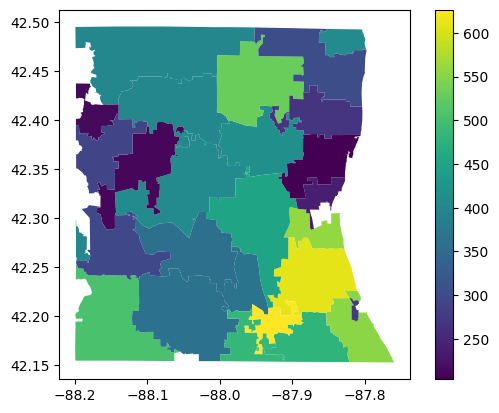

In [53]:
df3.plot("Breast_Can", legend=True)


Map of Colorectal Cancer

<Axes: >

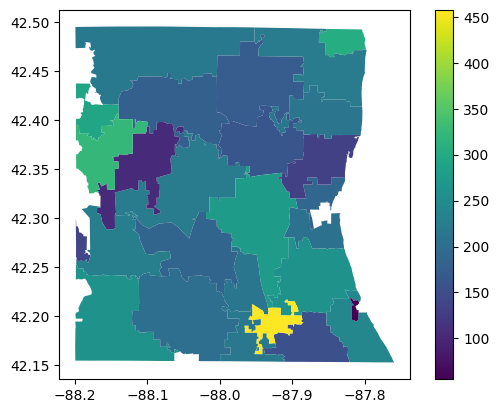

In [57]:
df3.plot("Colorectal", legend=True)


In [ ]:
ANALYSIS
